In [ ]:
# 动态规划
# 基于动态规划的强化学习算法主要由两种： 策略迭代，价值迭代

In [ ]:
# 策略迭代由两部分组成： 策略评估、策略提升
# 策略评估使用贝尔曼期望方程来得到一个策略的状态价值函数，这是一个动态规划的过程


In [ ]:
# 价值迭代：直接使用贝尔曼最优方程来进行动态规划，得到最终的最优状态价值


In [ ]:
‘’‘ 
不同于 3.5 节介绍的蒙特卡洛方法和第 5 章将要介绍的时序差分算法，
基于动态规划的这两种强化学习算法要求事先知道环境的状态转移函数和奖励函数，
也就是需要知道整个马尔可夫决策过程。
在这样一个白盒环境中，不需要通过智能体和环境的大量交互来学习，
可以直接用动态规划求解状态价值函数。
但是，现实中的白盒环境很少，这也是动态规划算法的局限之处，
我们无法将其运用到很多实际场景中。
另外，策略迭代和价值迭代通常只适用于有限马尔可夫决策过程，
即状态空间和动作空间是离散且有限的。
’‘’

In [ ]:
# 使用 策略迭代 和 价值迭代 来实现求解 悬崖漫步这个环境中的最优策略

In [ ]:
# 悬崖漫步：是一个非常经典的强化学习环境，它要求一个智能体从起点出发，避开悬崖行走，最终到达目标位置

In [1]:
from IPython.display import Image


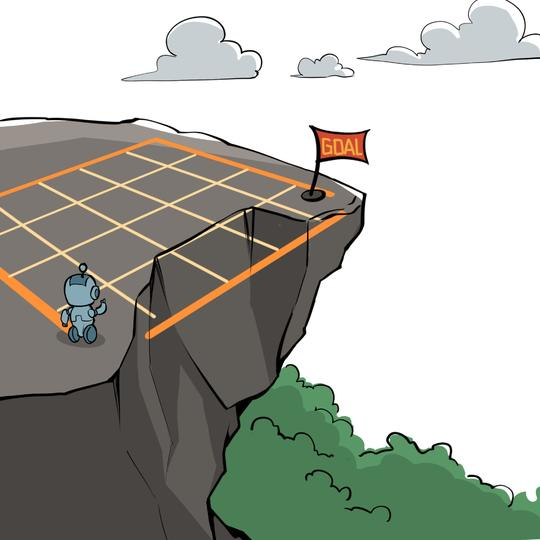

In [3]:
Image(filename="./image/walking.jpeg",width=300)

In [ ]:
import  copy
class WalkingEnv:
    """ 悬崖漫步环境"""
    def __init__(self,ncol=12,nrow=4):
        self.ncol = ncol # 定义网格世界的 列
        self.nrow = nrow # 定义网格世界的 行
        # 转移矩阵P[state][action] = [(p,next_state,reward,done)] 包含下一个状态next_state和奖励reward
        self.P = self.createP()
        
    def createP(self):
        
        # 初始化 状态转移矩阵P 即构建网格
        P = [[[] for j in range(4) for i in range(self.nrow * self.ncol)]]
        # 4种动作：change[0]:上 ,change[1]:下,change[2]:左,change[3]:右
        # 一个二维列表，表示每个动作 a 对应的坐标变化。
        # 例如，change[a][0] 和 change[a][1] 分别表示动作 a 在 x 和 y 方向上的变化。
        # [0,-1]向上移动  [0,1]向下移动 [-1,0]向左移动  [1,0]向右移动
        change = [[0,-1],[0,1],[-1,0],[1,0]]
        
        for i in range(self.nrow): # 行
            for j in range(self.ncol): # 列
                # 尝试每个动作
                for a in range(4):
                    # 到达悬崖 或者 到达终点，无法继续交互，任何动作奖励都是0
                    if i == self.nrow-1 and j>0: # 到达最后一行，且不在出发点
                        # 注意最开始i为0，因为range的开始为0
                        P[i * self.ncol + j][a] = [(1,i * self.ncol+j,0,True)]
                        continue
                    # 其他位置
                    # 在x轴上的新位置
                    next_x = min(self.ncol-1,max(0,j+change[a][0]))
                    # 在y轴上的新位置
                    next_y = min(self.nrow-1,max(0,i+change[a][1]))
                    
                    next_state = next_y * self.ncol + next_x
                    reward = -1
                    done = false
                    # 下一个位置是悬崖或者 终点
                    if next_y == self.nrow -1 and next_x >0 :
                        done = True
                        # 下一个位置是悬崖
                        if next_x != self.ncol -1:
                            reward = -100
                    P[i * self.ncol + j][a] = [(1,next_state,reward,done)]
                        
        return P          

In [ ]:
# 策略迭代是策略评估和策略提升不断循环交替，直至最后得到最优策略的过程

In [ ]:
# 策略评估:这一过程用来计算一个策略的状态价值函数。

$ V^π{(s)} = \sum_{a∈A}{π(a|s)(r(s,a)+γ\sum_{s`∈S}{p(s`|s,a)V^π{(s`)})})}$

In [ ]:
# π(a|s)是策略π在状态s下爱去动作a的概率。

In [ ]:
# 策略提升：使用策略评估计算得到当前策略的状态价值函数之后，可以使用策略提升来改进该策略

假设在策略π下，从每个状态s出发，最终得到的期望回报是Vπ。我们要如何改变策略来获得在状态s下更高的期望回报呢？
假设智能体在状态s才采取动作a，之后的动作依旧遵循策略π，此时得到的期望的回报就是Qπ(s,a)
如果Qπ(s,a) > Vπ(s) 说明在状态s下采取动作a会比原来的策略π得到更高的期望回报。

Qπ(s,π`(s)) ≥ Vπ(s) --->  Vπ`(s) ≥ Vπ(s)
这便是策略提升。

In [ ]:
我们可以直接贪心地在每个状态选择动作价值最大的动作：

$ π`(s) = argmax_a{Q^π{(s,a)}} = argmax_a{\{r(s,a) + γ\sum_{s^`}{P(s`|s,a)V^π(s`)} \}}$

In [ ]:
我们发现构造的谈心策略π`满足策略提升定理的条件，所以策略π`能够比策略π更好或者至少与其一样好。

In [ ]:
这个根据贪心法选%xdel动作从而得到新策略的过程成为策略提升。
当策略提升之后得到的策略和之前的策略一样时，说明策略迭代达到了收敛，此时和就是最优策略

In [ ]:
策略提升定理的证明：如下 
使用上述提升公式得到的新策略在每个状态的价值不低于原策略在该状态的价值。

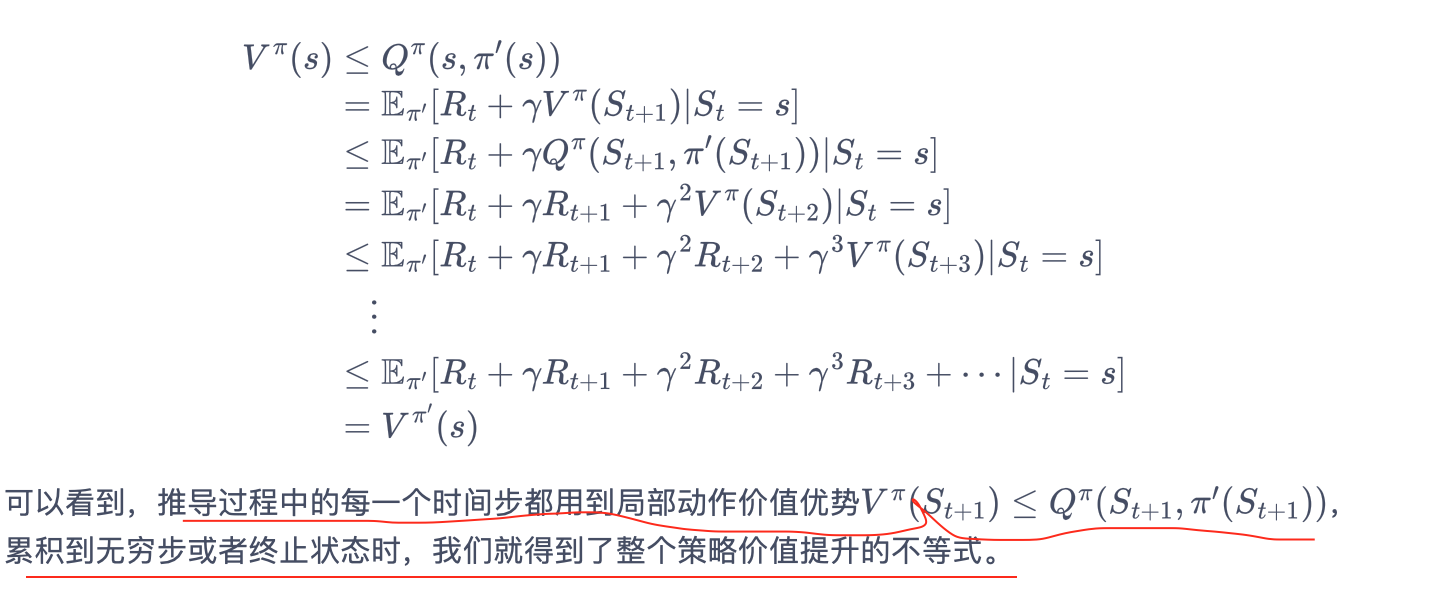

In [4]:
Image(filename="./image/pu.png",width=600)

In [7]:
''' 
总体来说，策略迭代算法的过程如下：
对当前的策略进行策略评估，得到其状态价值函数，
然后根据该状态价值函数进行策略提升以得到一个更好的新策略，
接着继续评估新策略、提升策略……直至最后收敛到最优策略
'''


' \n总体来说，策略迭代算法的过程如下：对当前的策略进行策略评估，得到其状态价值函数，\n然后根据该状态价值函数进行策略提升以得到一个更好的新策略，\n接着继续评估新策略、提升策略……直至最后收敛到最优策略\n'

In [ ]:
'''
动作价值函数 和状态价值函数之间的关系：
在使用策略π中，状态s的状态价值V = sum(在该状态下基于策略π采取所有动作的概率 * 相应的价值函数)
'''

$V^π{(s)} = \sum_{a∈A}{π(a|s)  Q^π{(s,a)}}$

In [ ]:
import copy
# 策略迭代算法
class PlicyIteration:
    def __init__(self,env,theta,gamma):
        self.env = env
        
        self.v = [0]*self.env.ncol * self.env.nrow # 初始化价值为0
        self.pi = [[0.25,0.25,0.25,0.25] for i in range(self.env.ncol*self.env.nrow)]
        self.theta = theta # 策略评估收敛阀值
        self.gamma = gamma # 折扣因子
        
    def policy_evaluation(self): # 策略评估
        cnt = 0 # 计数器
        while 1:
            max_diff = 0 # 存储当前迭代中状态价值函数的最大化变化量
            new_v = [0] * self.env.ncol*self.env.nrow
            for s in range(self.env.ncol * self.env.nrow):
                qsa_list = [] # 存储状态s下所有的Q(s,a)价值
                for a in range(4): # 此处有4个动作
                    qsa = 0
                    for res in self.env.P[s][a]:
                        p,next_state,r,done = res
                        # 本章环境比较特殊，奖励和下一个状态有关，所以要和状态转移概率相乘
                        # p：从当前状态 s 采取动作 a 后转移到下一个状态 s`的概率
                        qsa += p *(r + self.gamma * self.v[next_state] * (1-done))
                    qsa_list.append(self.pi[s][a] * qsa)
                new_v[s] = sum(qsa_list) # 状态价值函数和动作价值函数之间的关系
            self.v = new_v # 每个状态的状态价值V
            # 满足收敛条件
            if max_diff < self.theta:
                break
            cnt+=1
        print("策略评估完成%d轮"%cnt)
    
    def policy_improvement(self):#策略提升
        for s in range(self.env.ncol * self.env.ncol):
            qsa_list = []
            for a in range(4):
                qsa = 0
                for res in self.env.P[s][s]:
                    p,next_state,r,done= res
                    qsa +=p *(r + self.gamma * self.v[next_state]*(1-done))
                qsa_list.append(qsa)
            # 获取最大值
            maxq = max(qsa_list)
            # 计算有几个动作得到了最大的Q值
            cnt_q = qsa_list.count(maxq)
            # 让这些动作均分概率
            self.pi[s] = 1/cnt_q if q==maxq else 0 for q in qsa_list]
        print("策略提升完成")
        return self.pi
    
    def policy_iteration(self):#策略迭代
        while 1:
            self.policy_evaluation()
            old_pi = copy.deepcopy(self.pi)
            new_pi = self.policy_improvement()
            # 策略到达不动点的时候，停止操作
            if old_pi == new_pi:break
        

In [2]:
pi_list =[[0.25, 0.25, 0.25, 0.25] for i in range(3 * 3)]
print(pi_list)

[[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]


In [ ]:
# 打印当前策略在每个状态下的价值以及智能体会采取的动作。
def print_agent(agent,action_meaning,disaster=[],end=[]):
    print("状态价值:")
    for i in range(agent.env.nrow):
        for j in range(agent.env.ncol):
            print('%6.6s' % ('%.3f' % agent.v[i * agent.env.ncol + j]), end=' ')
        print()# 输出一个空行
        
        
    print("策略：")
    for i in range(agent.env.nrow):
        for j in range(agent.env.ncol):
            # 一些特殊的状态,例如悬崖漫步中的悬崖
            if (i * agent.env.ncol + j) in disaster:
                print('****', end=' ')
            elif (i * agent.env.ncol + j) in end:  # 目标状态
                print('EEEE', end=' ')
            else:
                a = agent.pi[i * agent.env.ncol + j]
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end='')
        print()

env = WalkingEnv()
action_meaning = ['^', 'v', '<', '>']
theta = 0.001
gamma = 0.9
agent = PlicyIteration(env,theta,gamma)
agent.policy_iteration()
print_agent(agent,action_meaningn,list(range(37*47)）,[47])
    

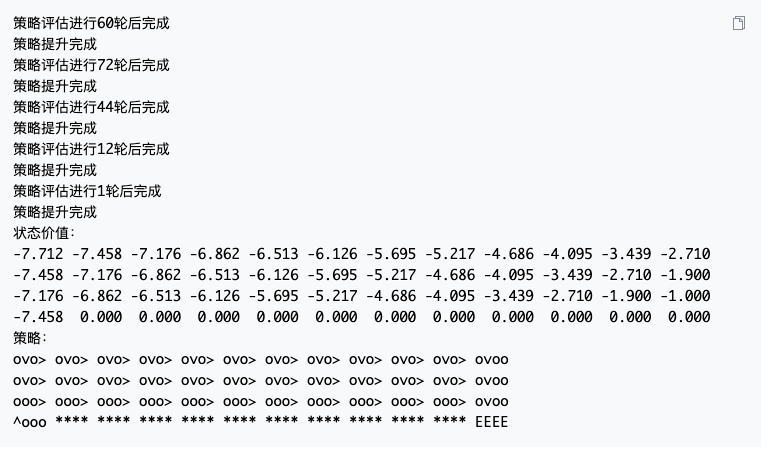

In [5]:
Image(filename="./image/policy_01.png",width=600)

In [ ]:
'''
策略迭代中的策略评估需要进行很多轮才能收敛得到某一策略的状态函数，
这需要很大的计算量，尤其是在状态和动作空间比较大的情况下。
我们是否必须要完全等到策略评估完成后再进行策略提升呢？
'''

策略迭代 --》价值迭代

In [ ]:
'''
如果只在策略评估中进行一轮价值更新，然后直接根据更新后的价值进行策略提升，
这样是否可以呢？答案是肯定的，这其实就是本节将要讲解的价值迭代算法，
它可以被认为是一种策略评估只进行了一轮更新的策略迭代算法。
'''
# 需要注意的是，价值迭代中不存在显式的策略，我们只维护一个状态价值函数。

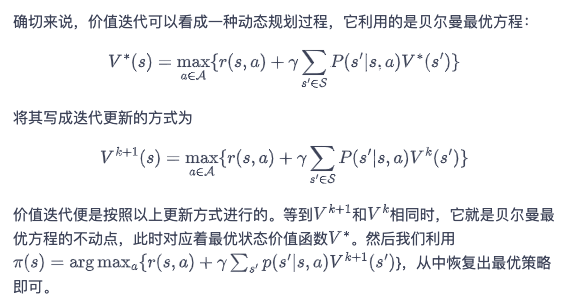

In [6]:
Image(filename="./image/value_iter.png",width=600)

In [ ]:
class ValueIteration:
    def __init__(self,env,theta,gamma):
        self.env = env
        self.v = [0] * self.env.ncol * self.env.nrow # 初始化价值为0
        self.theta = theta
        self.gamma = gamma
        # 价值迭代结束后得到的策略
        self.pi = [None for i in range(self.env.ncol * self.nev.nrow)]
        
    def value_iteration(self):
        cnt = 0
        while 1:
            max_diff = 0
            new_v = [0] *self.env.ncol * self.env.nrow
            for s in range(self.env.ncol*self.env.nrow):
                qsa_list = [] # 计算状态s下的所有Q(s,a)价值
                for a in range(4):
                    qsa = 0
                    for res in self.env.P[s][a]:
                        p,next_state,r,done = res
                        qsa +=p*(r + self.gamma* self.v[next_state]* (1-done))
                    qsa_list.append(qsa) # 这一行和下一行代码是价值迭代和策略迭代的主要区别
                # 当前状态s，选择这四个动作中最大的
                new_v[s] = max(qsa_list)
                max_diff = max(max_diff,abs(new_v[s] - self.v[s]))
            self.v = new_v # 存储了所有状态s的最大Q值
            # 满足收敛条件，退出评估迭代
            if max_diff < self.theta:break
            cnt +=1
        print("价值迭代一共进行%d轮" %cnt)
        self.get_policy()
    
    def get_policy(self):# 根据价值函数导出一个贪婪策略
        for s in range(self.env.ncol*self.env.nrow):
            qsa_list = []
            for a in range(4):
                qsa = 0
                for res in self.env.P[s][a]:
                    p,next_state,r,done = res
                    qsa +=p *(r + self.gamma * self.v[next_state] *(1-done))
                qsa_list.append(qsa)
           
            maxq = max(qsa_list)
            # 计算有几个动作得到了最大值
            cntq = qsa_list.count(maxqa)
             # 让这些动作均分概率
            self.pi[s] = [1 / cntq if q == maxq else 0 for q in qsa_list]
    
env = CliffWalkingEnv()
action_meaning = ['^', 'v', '<', '>']
theta = 0.001
gamma = 0.9
agent = ValueIteration(env, theta, gamma)
agent.value_iteration()
print_agent(agent, action_meaning, list(range(37, 47)), [47])
                

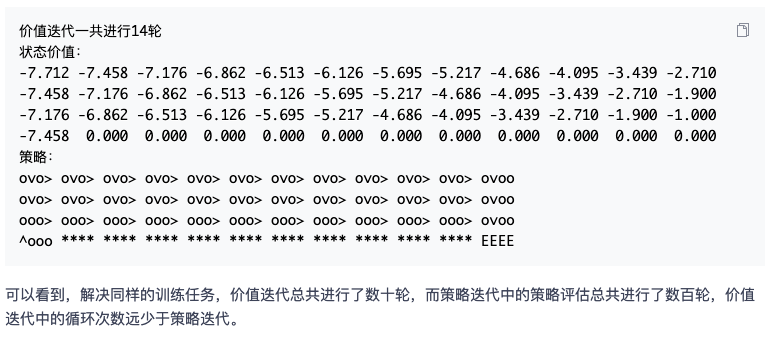

In [8]:
Image(filename="./image/value_iter_out.png")